<a href="https://colab.research.google.com/github/LeonimerMelo/Deep_Learning/blob/Artificial-Neural-Networks/Simple_Deep_Learning_%5Bmake_moons%5D_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução às Redes Neurais Artificiais

O estudo das Redes Neurais Artificiais não é algo novo e data o ano de 1958
com o artigo “The perceptron: A probabilistic model for information storage and
organization in the brain.”, de Frank Rosenblatt. Nesse trabalho, o cientista propôs um
modelo matemático de neurônio artificial, denominado Perceptron, para tentar simular o
funcionamento de um neurônio biológico.



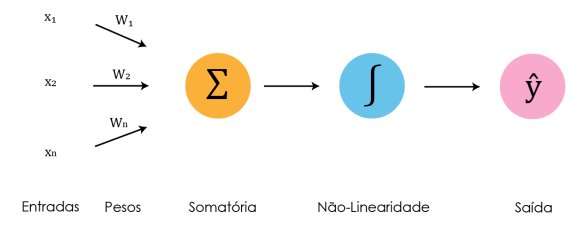

A função não linear é acrescentada à modelagem do neurônio artificial uma vez que a
maior parte dos problemas reais não possuem uma relação linear. Chama-se essa função
de Função de Ativação uma vez que a mesma é responsável por “ativar” os neurônios que
representem escolhas, ou características, importantes ao problema. Muitas funções são
utilizadas como função de ativação, como a Sigmoid, Tanh e ReLu, cada uma tendo suas
características e aplicações.

###Feedfoward Neural Network

Tendo modelado um neurônio artificial, pode-se organiza-los em diversas arquiteturas
formando redes: as Redes Neurais. A arquitetura de Rede Neural mais comum é
conhecida como **Feedfoward Neural Network**, ou **Multilayer Perceptron**. Nela, os
neurônios são organizados em camadas e a informação é propagada de uma camada para
outra, até que, ao final da rede, haja uma predição. A Figura abaixo em que as circunferências
representam os neurônios e as linhas os seus respectivos pesos, ilustra um exemplo de
Rede Neural com 4 entradas, 2 saídas e 4 camadas.

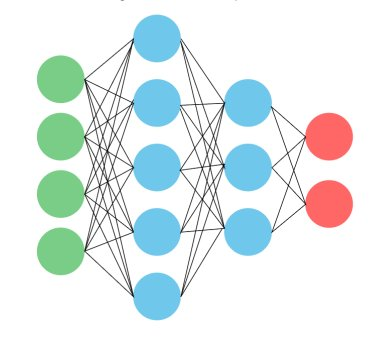

A camada formada pelos neurônios verdes é a camada de
entrada, que admite os inputs do modelo, a camada vermelha é a camada da saída, onde
são feitas as predições, e as camadas azuis são chamadas de *hidden layers* (camadas
escondidas), onde cada neurônio é responsável por uma “característica” inerente à
predição.

###Princípio de funcionamento da Rede Neural *Feedfoward*

Primeiramente, todos os pesos e biases do modelo são
inicializados. As entradas do modelo, então, chegam por meio da camada de entrada e
são transferidas junto aos seus respectivos pesos para cada neurônio da primeira hidden
layer. Cada neurônio desse realiza uma operação segundo a Equação $z=\phi(wx+b)$, onde $\phi$ é uma função não linear, e seus resultados,
juntamente com seus pesos, são passados para cada neurônio da camada seguinte até o final
da rede, onde há a predição.

Feita a predição, calcula-se uma função de custo para determinar o quão eficiente é o
modelo e se atualiza todos os pesos e *biases* por meio da Descida de Gradiente, ou de um
algoritmo de otimização similar. O processo é, então, repetido até a convergência do
modelo, momento em que cada neurônio se torna capaz de identificar um padrão ou
característica presente nos dados de entrada, permitindo, assim, que o modelo faça
predições corretas.

##Backpropagation
Lida-se, em redes neurais, com um grande número de pesos e biases que precisam ser
otimizados durante a fase de treinamento do modelo. Como já fora comentado, o cálculo
de todos os gradientes relacionados ao problema é muito custoso do ponto de vista
computacional. Como forma de mitigar o grande tempo de processamento, utiliza-se um
algoritmo chamado *Backpropagation*.

Após a etapa de *feedfoward*, ou seja, após a passagem de informação pela rede, procura-
se calcular a função de custo e as derivadas parciais dessa função em relação a cada um
dos parâmetros da rede, como forma de entendimento quanto à variação da saída do
modelo em relação à variação de cada um desses pesos e biases. O Algoritmo de *Retropropagação*, ou *Backpropagation*, determina essas derivadas por meio da Regra de
Cadeia, permitindo que a informação percorra o caminha contrário, em direção à entrada,
e observando como ela se comporta durante o caminho.

<img src="https://editor.analyticsvidhya.com/uploads/18870backprop2.png" width=800>

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)

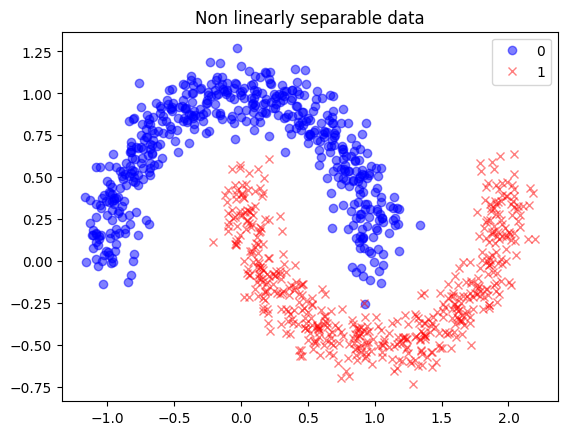

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])
plt.title('Non linearly separable data');

In [ ]:
X.shape

(1000, 2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Deep Model
The word **deep** in Deep Learning has changed meaning over time. Initially, it was used to refer to networks that had more than a single layer. As the field progressed, and researchers designed models with many inner layers, the word shifted to meaning networks with hundreds of layers and billions of parameters. In this book, we will use the original meaning and call "deep" any model with more than one layer, so let's add a few layers and create our first "deep" model.

Let's build a model with the following structure:


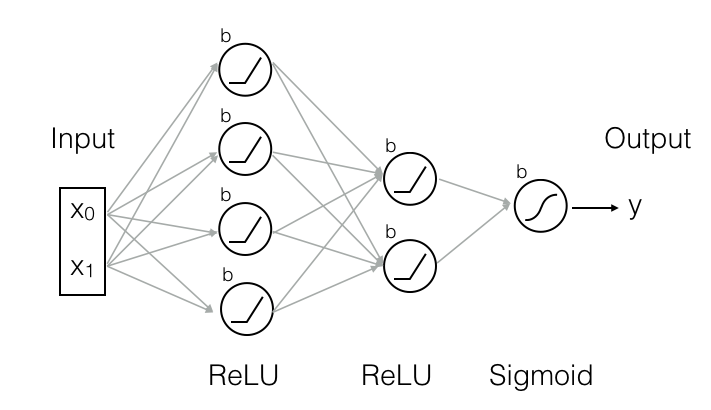

This model has three layers. The first layer has four nodes, with two inputs and a `relu` activation function. Each of the two nodes in the second layer receives the four values at the output of the first layer, performs a weighted average and then pipes the output through a `relu` activation function. Finally, the two outputs of this layer go into the third layer, which is also our output layer. This only has one node and a `sigmoid` activation function, so that the output values are constrained between 0 and 1.

We can build this network in Keras very easily. All we have to do is `add` more layers to the `Sequential` model, specifying the number of nodes and the activation for each of them using the `.add()` function. Let's start with the first layer:

In [ ]:
# libraries for neural network model using keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad

Basically there are two types of models in Keras. Sequential and Functional.

The sequential API is generally used and helps in creating the models layer-by-layer for most problems. It is constrained in that it does not allow us to create models that share layers or have multiple inputs or outputs.

The functional API helps in creating models that have a lot more flexibility as we can easily define models where layers connect to more than just the previous and next layers. In fact, we can connect layers to any other layer. As a result, creating complex networks become possible.

In [ ]:
# clear the current Keras session.
from keras import backend as K
K.clear_session()

A dense layer is a Layer in which Each Input Neuron is connected to the output Neuron, like a Simple neural net, the parameters units just tells you the dimensionnality of your Output.

In [ ]:
#from os import name
model = Sequential(name='minha_primeira_rede')
model.add(Input((2,), name='entrada'))
model.add(Dense(bias_initializer='zero', units=4, activation='relu', name='1a_camada_oculta', kernel_initializer='uniform'))

This is very similar to what we did above, except that now this `Dense` layer has four nodes instead of one. How many parameters are there in this layer? There are twelve parameters, two weights for each of the nodes (2*4) plus one bias for each of the nodes (4).

Let's now add a second layer after the first one, with two nodes:

In [ ]:
model.add(Dense(activation='relu', name='2a_camada_oculta', units=2))

Notice that we didn't have to specify the `input_dim` parameter because Keras is smart and automatically matches it with the output size of the previous layer.

Finally, let's add the output layer:

In [ ]:
model.add(Dense(1, activation='sigmoid', name='saida'))

In [ ]:
model.summary()

Model: "minha_primeira_rede"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ 1a_camada_oculta (Dense)             │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 2a_camada_oculta (Dense)             │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ saida (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

##Otimizadores
**Adam** (Estimativa de Momento Adaptativo) e **SGD** (*Stochastic Gradient Descent*) são dois algoritmos de otimização usados para treinar redes neurais em aprendizado de máquina. Ambos têm vantagens e desvantagens, e a escolha do otimizador depende do seu problema específico.

O **SGD** é frequentemente escolhido para problemas de classificação binária ou multiclasse, especialmente quando o conjunto de dados é grande. É mais rápido que o Adam, mas requer um ajuste cuidadoso da taxa de aprendizado e outros hiperparâmetros para resultados ideais.

**Adam** é frequentemente escolhido para pequenos conjuntos de dados ou ao treinar redes neurais profundas. Por usar estimativas adaptativas do primeiro e segundo momentos para atualizar os pesos da rede, ele tende a convergir para o mínimo global mais rapidamente e não requer um ajuste cuidadoso da taxa de aprendizado.

**Adagrad** é um otimizador com taxas de aprendizagem específicas de parâmetros, que são adaptadas em relação à frequência com que um parâmetro é atualizado durante o treinamento.

**RMSprop** (*Root mean square propagation*) ou *RMSP* é um algoritmo de aprendizagem adaptativo que tenta melhorar o AdaGrad. Em vez de obter a soma cumulativa dos gradientes quadrados como em AdaGrad, ele usa a 'média móvel exponencial'.


Let's compile the model:

In [ ]:
model.compile(optimizer=SGD(0.07), loss='binary_crossentropy', metrics=['accuracy'])

The Input layer parameter is the number of dimensions in our input data points. In this case, each point is described by two numbers, so the input dimension is equal to 2 (for the first `Dense()` layer). `dense_2(1)` is the output layer. Here we are classifying 2 classes, blue dots and red crosses, and therefore it's a binary classification and we are predicting a single number: the probability of being in the class of the red crosses.

Let's train it and see how it performs, using the `.fit()` method again:

In [ ]:
model.get_weights()

[array([[-0.03089819,  0.02356574, -0.01263471,  0.03647604],
        [-0.03014399, -0.01408341,  0.02425493,  0.02679248]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.32103372, -0.77745557],
        [ 0.33337379, -0.16723418],
        [ 0.70513034,  0.8832247 ],
        [ 0.77052116, -0.25712156]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.1498786],
        [1.3953813]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model.weights[0][0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>

In [ ]:
history = model.fit(X_train, y_train, epochs=30, verbose=1)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6550 - loss: 0.6737   
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.6122 
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.5474 
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8300 - loss: 0.4898 
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8479 - loss: 0.4390
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8776 - loss: 0.3845 
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8663 - loss: 0.3712 
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8846 - loss: 0.3389 
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8763 - loss: 0.3299 
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9033 - loss: 0.3113
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8895 - loss: 0.3107 
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

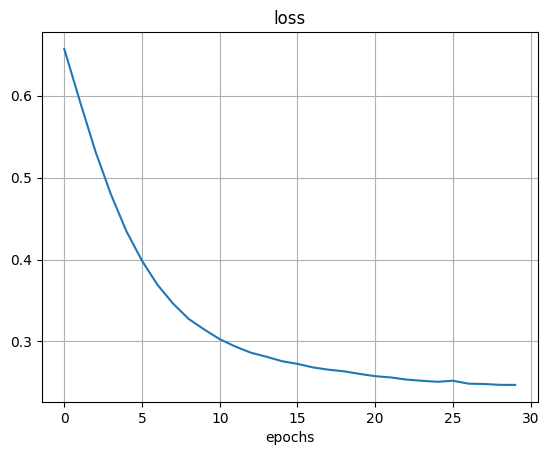

In [ ]:
plt.plot(history.history['loss'])
#plt.ylim(0,5)
plt.title('loss')
plt.xlabel('epochs')
plt.grid()
plt.show()

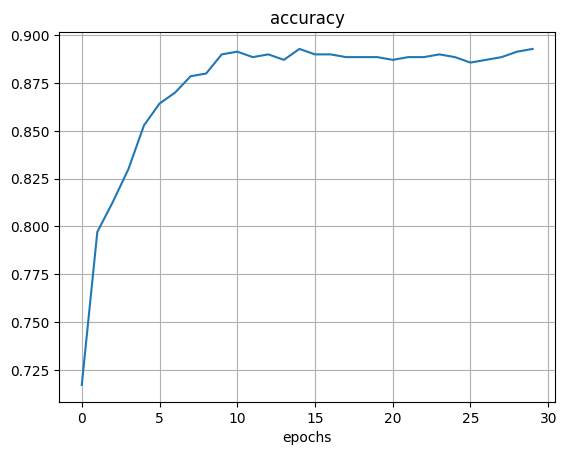

In [ ]:
plt.plot(history.history['accuracy'])
#plt.ylim(.5,1)
plt.title('accuracy')
plt.xlabel('epochs')
plt.grid()
plt.show()

In [ ]:
# predições
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# as predições são valores reais de 0 a 1 --> sigmoid activation function
y_train_pred[0:10]

array([[0.9793347 ],
       [0.98506683],
       [0.1518292 ],
       [0.07391047],
       [0.62840277],
       [0.9573083 ],
       [0.65819746],
       [0.07391047],
       [0.8889668 ],
       [0.11679741]], dtype=float32)

In [ ]:
y_train_pred.max()

0.99830437

In [ ]:
y_train_pred.min()

0.073910475

In [ ]:
# aqui nós transformamos as predições em valores binários --> if y_train_pred > 0.5 == 1 else == 0
(y_train_pred > 0.5).astype("int32")[0:10]

array([[1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Evaluate prediction accuracy

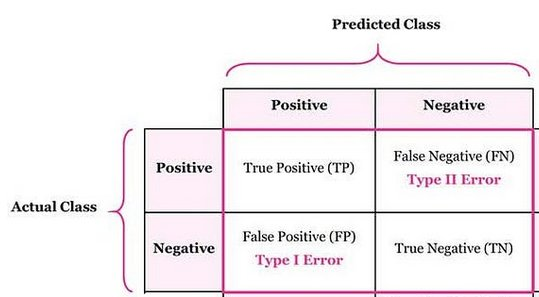

###Type 1 vs. Type 2 Errors: Understanding the Difference
* Type 1 Error: Occurs when the model predicts a positive outcome, but in reality, it’s negative. Essentially, it’s a false alarm.
* Type 2 Error: Represents the opposite scenario. The model predicts a negative outcome, but the reality is positive. This is akin to a missed opportunity.

###The Confusion Matrix Estimates
The term “confusion matrix” might sound a bit puzzling at first, but its name gives insight into its purpose. A confusion matrix helps us understand where our classification model is getting “confused” or making mistakes.

* False Positive (FP): Instances which are actually negative, but the model mistakenly predicts them as positive.
* False Negative (FN): Instances which are actually positive, but the model mistakenly predicts them as negative

The matrix, therefore, provides a consolidated view of where the model is correct and where it is mistaken, hence aiding in diagnosing the specific types of errors it is making.

In [ ]:
prediction_values_train = (y_train_pred > 0.5).astype("int32")
print('Train dataset confusion matrix:\n', confusion_matrix(y_train, prediction_values_train))

Train dataset confusion matrix:
 [[320  43]
 [ 35 302]]


In [ ]:
prediction_values_test = (y_test_pred > 0.5).astype("int32")
print('Test dataset confusion matrix:\n', confusion_matrix(y_test, prediction_values_test))

Test dataset confusion matrix:
 [[113  24]
 [ 23 140]]


In [ ]:
print('Test dataset accuracy: %.2f%%' %  (accuracy_score(y_test, prediction_values_test)*100))

Test dataset accuracy: 84.33%


In [ ]:
print('Test dataset classification report:\n\n', classification_report(y_test, prediction_values_test))

Test dataset classification report:

               precision    recall  f1-score   support

           0       0.83      0.82      0.83       137
           1       0.85      0.86      0.86       163

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [ ]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)

    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(10, 6))
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.title("Decision Boundary for Fully Connected");
    plt.show()

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


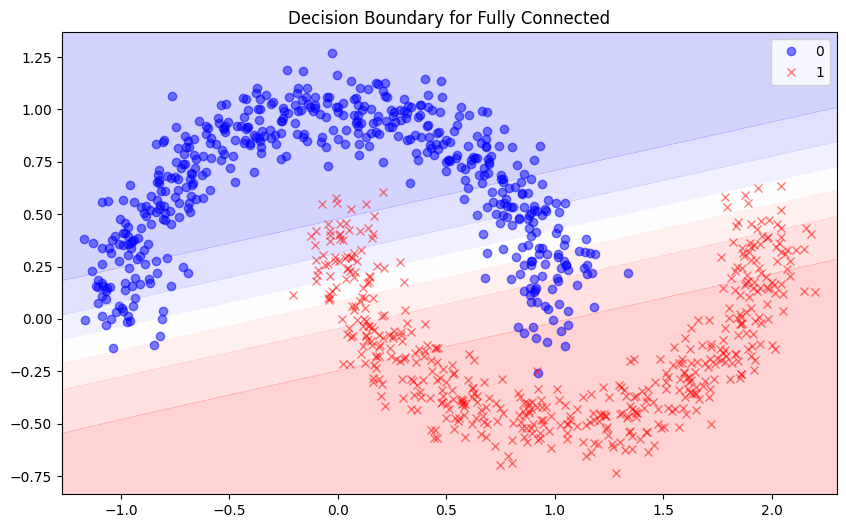

In [ ]:
plot_decision_boundary(model, X, y)

##Exercícios deep learning
1. Mantendo a arquitetura da rede, processa a sintonia dos hiperparâmetro: `learning_rate` e do número de iterações: `epochs`, tentando um melhor desempenho da rede. Tome cuidado com o *overfitting*! Elabore gráficos e/ou tabelas comparativas.
2. Efetue a normalização do banco de dados e compare os resultados, antes de depois de efetuar o *standardization*!
3. Modifique a estrutura da rede *deep learning* trocando a função de ativação (**relu**) das camadas ocultas pelas funções: *linear*, *tangente hiperbólica* e *sigmoid*. Elabore gráficos e/ou tabelas comparativas.
4. Com os melhores resultados conseguidos, proceda a mudança do otimizador substituindo o **SGD** (*Stochastic Gradient Descent*) pelo **Adam**, **Adagrad** e **RMSprop**.  Elabore gráficos e/ou tabelas comparativas.
5. Com os melhores resultados conseguidos, modifique a estrutura da rede para 10 neurônios na primeira camada oculta e 5 neurônios na segunda camada oculta. Modifique os parâmetros do banco de dados (*make_moons*) n_samples=3000 e depois 10000, com noise=0.2. Treine a rede e proceda os testes. Verifique a eficiência da rede utilzando métricas.

## Referências
[1] https://laxmikants.github.io/blog/neural-network-using-make-moons-dataset/

[2] https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6

[3] https://www.thedatahunt.com/en-insight/deep-learning

[4] https://www.kdnuggets.com/2020/03/build-artificial-neural-network-scratch-part-2.html

[5] https://www.deeplearningbook.com.br/funcao-de-ativacao/

[6] https://www.deeplearningbook.com.br/o-que-sao-redes-neurais-artificiais-profundas/

[7] https://www.analyticsvidhya.com/blog/2023/01/gradient-descent-vs-backpropagation-whats-the-difference/